# Interference to create any qubit with desired Probability Distribution. 

Idea by Rupayan CsMP (discord name).

The algorithm can be used to create multiqubit states (instead of just single qubit) with desired probability distribution, which is scalable. 

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

### Gates implementation logic

**Goal:** Create qubit state with $a^2$ probability of getting $|0\rangle$ and $b^2$ probability of getting $|1\rangle$. 

Immediately following a single Hadamard gate implementation, we implement a U3 gate with ($0, 0, \lambda$) where U3 gate is ($\theta, \phi, \lambda$) ordering, so $\theta = 0$, $\phi = 0$. 

Then we want to find $\lambda$, which equals to $cos^{-1} (|a|)$. 


1. Apply $H$ we get $|+\rangle$ state. 
2. Apply $U3$ with parameters ($0, 0, \lambda$): 
$$ \frac{1}{\sqrt{2}} \bigg(|0\rangle + e^{i\lambda}|1\rangle\bigg) $$
3. Apply $X$ gate: 
$$ \frac{1}{\sqrt{2}} \bigg(|1\rangle + e^{i\lambda}|0\rangle\bigg) $$
4. Apply $U3$ with parameters ($0, 0, -\lambda$): 
$$ \frac{1}{\sqrt{2}} \bigg(e^{-i\lambda}|1\rangle + e^{i\lambda}|0\rangle\bigg) $$
5. Apply $H$ gate: 
$$ a|0\rangle + ib|1\rangle $$

Interference exist and creates desired state here. 

In [10]:
%config Completer.use_jedi = False

from qiskit import *
from qiskit.visualization import *
from qiskit_textbook.tools import array_to_latex

import numpy as np

We are going to choose $a^2 = 0.2$ and $b^2 = 0.8$ here. 

In [13]:
print("What probability distribution would you like? ")
a_square = float(input("Input a^2: "))
b_square = float(input("Input b^2: "))

while (a_square + b_square) != 1:
    print("Invalid input, a^2 + b^2 == 1 is a requirement. Please input again: ")
    a_square = float(input("Input a^2: "))
    b_square = float(input("Input b^2: "))
    
V = np.sqrt(a_square)

lambda1 = np.arccos(V)

What probability distribution would you like? 


Input a^2:  0.2
Input b^2:  0.8


We will use $U$ gate as $U3$ gate is deprecating, as per instructed it acts identical. 

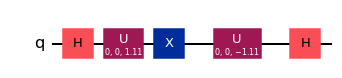

In [23]:
qc = QuantumCircuit(1)

qc.h(0)
qc.u(0, 0, lambda1, qubit=0)
qc.x(0)
qc.u(0, 0, -lambda1, qubit=0)
qc.h(0)

# qc.measure_all()

qc.draw("mpl", style="iqx")

In [24]:
backend = Aer.get_backend("statevector_simulator")
result = execute(qc, backend=backend, shots=5000).result()
state = result.get_statevector()

array_to_latex(state, pretext="\\text{Statevector} = ", precision=1)

<IPython.core.display.Math object>

So we are planning to get probability of 0.2 for $|0\rangle$ and 0.8 for $|1\rangle$. 

In [25]:
qc.measure_all()

qasm_backend = Aer.get_backend("qasm_simulator")
result = execute(qc, backend=qasm_backend, shots=5000).result()
counts = result.get_counts()

print(counts)

{'0': 996, '1': 4004}


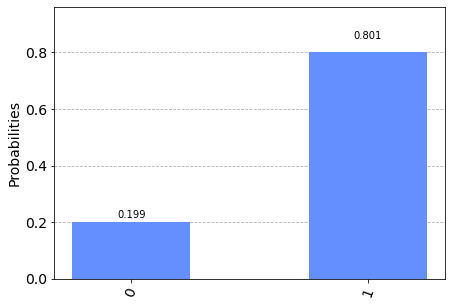

In [26]:
plot_histogram(counts)

And as expected, that's what we've got! 

We could try running on IBM simulator

In [27]:
provider = IBMQ.load_account()

from qiskit.tools import job_monitor

quito_backend = provider.get_backend("ibmq_quito")
transpiled_qc = transpile(qc, backend=quito_backend)
qobj = assemble(transpiled_qc, shots=8000)
job = quito_backend.run(qobj)
job_monitor(job, interval=2)

<ipython-input-27-0bc304a60daf>:8: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = quito_backend.run(qobj)


Job Status: job has successfully run


{'0': 2526, '1': 5474}


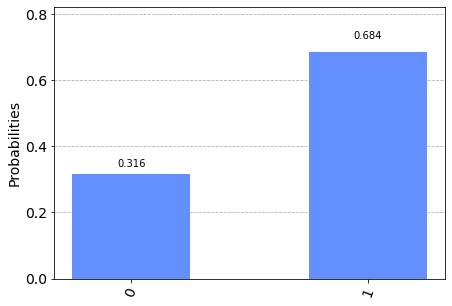

In [28]:
result = job.result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)